# Gradient Descent and Backpropagation
### Understanding the math behind gradient descent and how to implement backprogagation in python
--------------------
**Author: Jay Mody / Felipe Reis**

*Felipe Reis current's code is based on Jay Mody repository.*

**Required Knowledge:**
- Basic Python Skills
- Numpy
- Calculus (derivatives, gradients, chain rule)
- Linear Algebra (matrices, matrix multiplication)

## Imports

In [1]:
#### Imports ####
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

## Tools

In [2]:
colors_list = ['red', 'cyan', 'magenta', 'green', 'black', 'blue']
colors = ListedColormap(colors_list)

def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

def generate_area_map(features, points_per_int = 10, alpha = 0.2):
    ###  Area Map Set  ###
    xstart = int((features[:, 0].min() - 1) * points_per_int) # min start point of the x data
    xrang = int((features[:, 0].max() + 1) * points_per_int - xstart) # range of the data on x

    ystart = int((features[:, 1].min()  - 1) * points_per_int) # min start poing of the y data
    yrang = int((features[:, 1].max() + 1) * points_per_int - ystart) # range of teh data on y

    # Creates an array with all the coordinates of area map set
    area_map_set = np.array([[x + xstart, y + ystart] for x in range(xrang) for y in range(yrang)])
    area_map_set = area_map_set / points_per_int
    
    return area_map_set

def area_map_plot(network, area_map_set, features, targets, path = '', alpha = 0.1):
    # gets the prediction the model made for the area map set
    pred = network.predict(area_map_set)
    pred = [pred[i,:].argmax() for i in range(int(pred.shape[0]))]

    # draws the current area map and the test set overtop it, saves the scatter
    plt.scatter(features[:, 0], features[:, 1], c = targets, cmap =colors)
    plt.scatter(area_map_set[:, 0], area_map_set[:, 1], c = pred, alpha = alpha, cmap = colors)
    
    if path == '':
        plt.show()
    else:
        plt.savefig(path)
        plt.close()

## Data

In [3]:
from Data import mnistData
from Data import clusterData

## Data Params ##
n_features = 2
n_classes = 3 
n_training_samples = 400
n_testing_samples = 200
cluster_std = 0.15
center_box = (-2,2)
seed = 0

## Data ##
data = clusterData(n_features, n_classes, n_training_samples, 
                   n_testing_samples, cluster_std, center_box, seed)

x_train, y_train, y_train_raw = data.trainData()
x_test, y_test, y_test_raw = data.testData()

### Visualizing Datasets

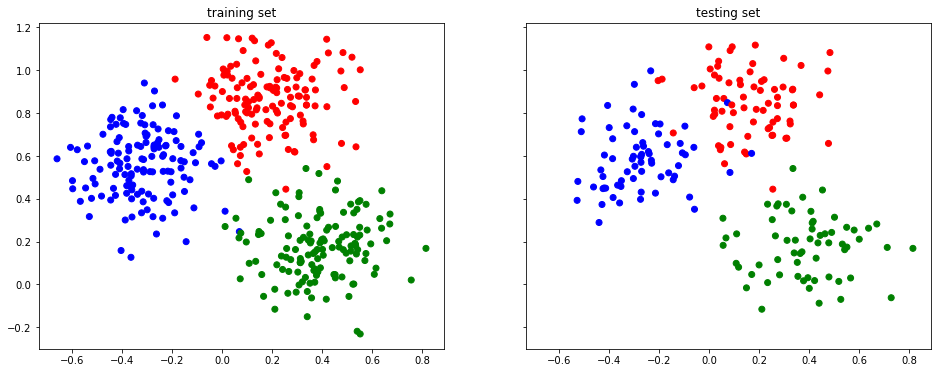

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, sharex = True, figsize=(16, 6))

_ = ax1.scatter(x_train[:, 0], x_train[:, 1], c = y_train_raw, cmap = colors)
_ = ax1.set_title('training set')

_ = ax2.scatter(x_test[:, 0], x_test[:, 1], c = y_test_raw, cmap = colors)
_ = ax2.set_title('testing set')

## Train

In [5]:
def train_procedure(network, n_epochs=3000, batch_size=32, print_loss=True):
    ## Tracking loss and accuracy ##
    losses = {'train':[], 'validation':[]}
    accuracy = {'train':[], 'validation':[]}

    ## Training Algorithim ##
    for epoch in range(n_epochs):
        batch_indices = np.random.choice(list(range(x_train.shape[0])), size = batch_size)
        features = np.array([x_train[i] for i in batch_indices])
        targets = np.array([y_train[i] for i in batch_indices])

        network.train(features, targets)

        # Printing out the training progress
        train_loss = MSE(network.predict(x_train).T, y_train_raw)
        val_loss = MSE(network.predict(x_test).T, y_test_raw)
        train_acc = network.test(x_train, y_train)
        val_acc = network.test(x_train, y_train)

        sys.stdout.write("\rProgress: {:2.1f}%".format(100 * epoch/float(n_epochs)) \
                         + " .. Training loss: " + str(train_loss)[:5] \
                         + " .. Valid. loss: " + str(val_loss)[:5] \
                         + " .. Training Acc: " + str(train_acc)[:5] \
                         + " .. Valid. Acc: " + str(val_acc)[:5])
        sys.stdout.flush()

        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        accuracy['train'].append(train_acc)
        accuracy['validation'].append(val_acc)
    
    
    #print loss graphs
    if(print_loss):
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, sharex = False, figsize=(16, 6))

        _ = ax1.plot(losses['train'], label='Training loss')
        _ = ax1.plot(losses['validation'], label='Validation loss')

        _ = ax2.plot(accuracy['train'], label='Training acc')
        _ = ax2.plot(accuracy['validation'], label='Validation acc')

        _ = fig.legend()
        fig.show()
        

def plot_test_results(network):
    print("Accuracy on Train Set:", network.test(x_train, y_train))
    print("Accuracy on Test Set:", network.test(x_test, y_test))

    area_map_set = generate_area_map(x_test)
    area_map_plot(network, area_map_set, x_test, y_test_raw)

## Network and Parameters

In [6]:
from NeuralNetwork import MLP

#define network parameters
n_input_nodes = n_features
n_output_nodes = n_classes
n_hidden_nodes = [64, 32]

#### Neural Network with Sigmoid

In [7]:
network_sigmoid = MLP(n_input_nodes, n_hidden_nodes, n_output_nodes, lr=0.1, activation_name='sigmoid')

Printing the test control, to see if the network is already trained.

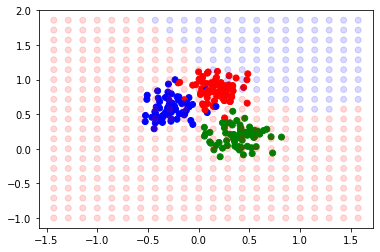

Accuracy on Train Set: 0.275
Accuracy on Test Set: 0.315


In [8]:
area_map_set = generate_area_map(x_test, points_per_int = 7)
area_map_plot(network_sigmoid, area_map_set, x_test, y_test_raw, alpha = 0.15)
    
print("Accuracy on Train Set:", network_sigmoid.test(x_train, y_train))
print("Accuracy on Test Set:", network_sigmoid.test(x_test, y_test))

Progress: 100.0% .. Training loss: 1.081 .. Valid. loss: 1.083 .. Training Acc: 0.977 .. Valid. Acc: 0.977

<ipython-input-5-9a7014783db8>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


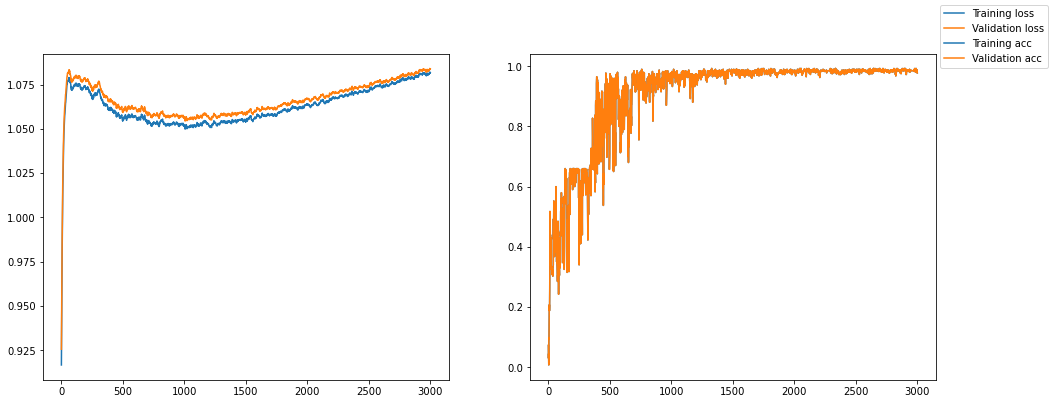

In [9]:
train_procedure(network_sigmoid, batch_size=32) #diminuir batch se não houver memória suficiente

Accuracy on Train Set: 0.9775
Accuracy on Test Set: 0.955


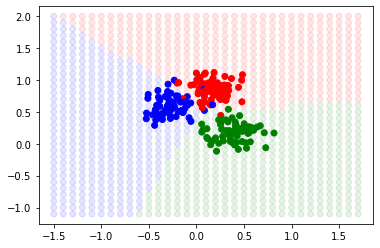

In [10]:
# plot network results, after training
plot_test_results(network_sigmoid)

#### Neural Network with ReLU

Progress: 100.0% .. Training loss: 1.315 .. Valid. loss: 1.313 .. Training Acc: 0.972 .. Valid. Acc: 0.972

<ipython-input-5-9a7014783db8>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


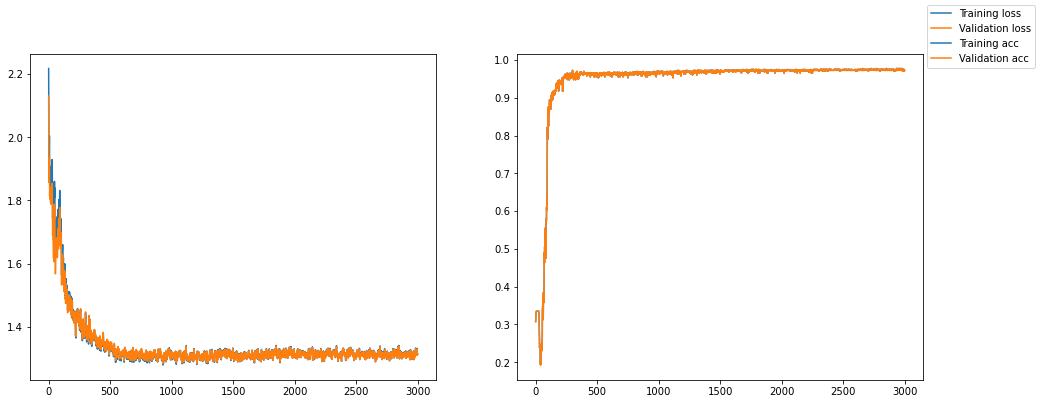

In [11]:
network_relu = MLP(n_input_nodes, n_hidden_nodes, n_output_nodes, lr=0.01, activation_name='relu')

train_procedure(network_relu, batch_size=32)

Accuracy on Train Set: 0.9725
Accuracy on Test Set: 0.965


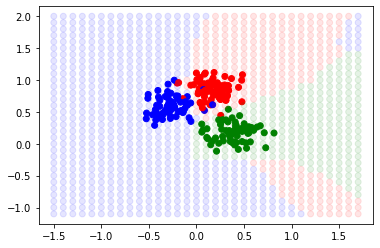

In [12]:
plot_test_results(network_relu)

#### Neural Network with Hiperbolic Tangent

Progress: 100.0% .. Training loss: 1.344 .. Valid. loss: 1.338 .. Training Acc: 0.982 .. Valid. Acc: 0.982

<ipython-input-5-9a7014783db8>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


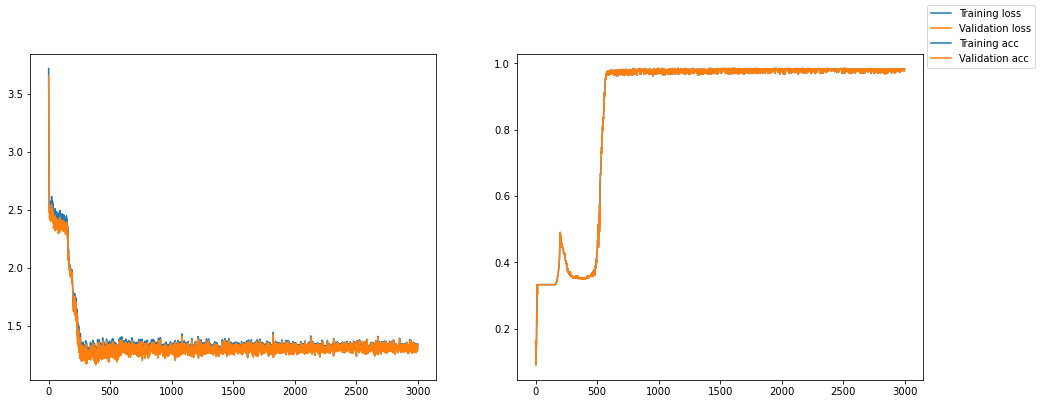

In [13]:
network_tanh = MLP(n_input_nodes, n_hidden_nodes, n_output_nodes, lr=0.1, activation_name='tanh')

train_procedure(network_tanh, batch_size=32)

Accuracy on Train Set: 0.9825
Accuracy on Test Set: 0.965


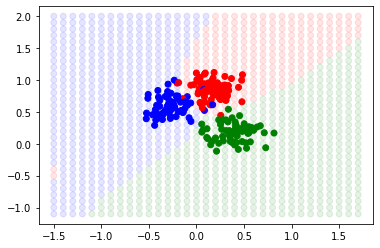

In [14]:
plot_test_results(network_tanh)